# W261 course notes
## Week 1: 8/31/2016
### Reading

*Doing Data Science (ch 1 and 2)*
* “Datify” all the things to maximize value
* Data science pipeline

*The human face of big data: Rick Smolan*
* Big data is like opening 1000s of more eyes. You can see dimensions you couldn’t see before. 
* Data that is garbage to some people are gold to others

*[Introduction to Information Retrieval - Ch 13](http://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf)*

*[Model selection](https://theclevermachine.wordpress.com/2013/04/21/model-selection-underfitting-overfitting-and-the-bias-variance-tradeoff/)*
* Bias-variance tradeoff. Bias = consistently get a prediction wrong. Variance = inconsistently make a prediction.

<IPython.core.display.Javascript object>


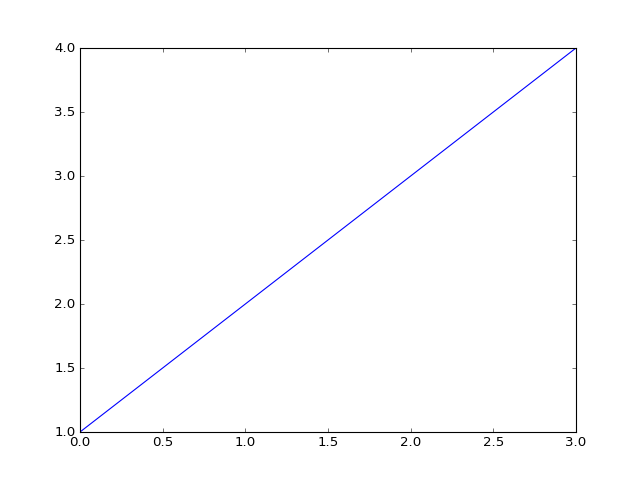

In [1]:
# Use this for interactive plots
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd

pd.Series([1,2,3,4]).plot()

When asking the professor a question, use the STAR approach: Situation, Task, Action, Result.

### Lectures

You must participate in the online Google group to get full participation credit.

Data modeling pipeline
* Understand domain, collect requirements
* Warehouse data
* EDA
* Feature engineering
* Modeling
* Lab-based experiments
* Deploy models and AB test


Bias-variance tradeoff
* Errors = bias^2 + variance + irreducible error
* Simple models have more bias and less variance
* Complex models have less bias and more variance

Squared bias = amount by which the expected model prediction differs from the true value over the training data

Variance = amount by which prediction over one training set differs from the expected predicted value over all training sets

$y = f(x) + \sigma^2$

Formula of bias = $E[h(x^*)]-f(x^*)$

Formula of variance = $E[h(x^*)-E[h(x^*)])^2]$

Formula of irreducible noise = $E[(y-f(x^*))^2] = E[\epsilon^2] = \sigma^2$

$h(x^*)$ is the model's prediction

$f(x^*)$ is the true value of the function

$y$ is the actual value

Standard procedure for calculating:
* Train model on bootstrap sample of data. Test model on datapoints that are not contained in the bootstrap sample. 


Before starting anything, do a back of an envelope calculation first.

Good rule of thumb. Reading 1TB = 3 hours on your machine.

#### Problem solving using the command line
Allowed commands
* split: Split a file into many files
 * -l line_count: create smaller files line_count lines in length
 * -b byte_count: create smaller files byte_count bytes in length. Append k or m to make it kilobytes or megabytes
 * -a suffix_length: Defines how many total files can be created. suffix_length^26 total files. Default is 3.
 * usage: split [options][input file][prepend to output files]
* grep: Searches any given input files and selects lines that match one or more basic regular expressions. If the files are compressed, use zgrep. grep [search text] [file path]
 * -e pattern: include any regular expression. Can repeat to find multiple patterns
* wc: Counts things in the file
 * -c: count bytes
 * -l: count lines
 * -m: count characters
 * -w: count words
* cat: Concatenate files together. cat [list of files] > [output file]
* echo: prints text to screen
* for: allows for iteration
* cut: Cuts out selected portions of each line. 
 * -c list: The list specifies character positions
 * -f list: The list specifies fields, separated in the input by the field delimiter character.
 * -d delim: Use delim as the field delimiter character instead of the tab character.
 * End with file location
* paste: concatenates lines in separate files into one line. Can also use it to concatenate all the lines in a single file into one line.
 * -d list: characters to use to separate concatenated lines. Default is the tab character
 * usage to concatenate files: paste [file1] [file2] 
 * usage to concatenate all lines in a file or input: seq 10 | paste -sd[delimiter] -
* bc: Basic calculator. Usage echo "scale=10; math equation" | bc
 * scale = the precision of each calculation
* &: At the end of a line, sends the command to the background ctrl-z brings it back to the front. This causes the parent process to spawn off parallel processes and thus enables parallel computing.
* wait: waits for a specified subprocess to finish. Can reference subprocess with the actual process ID (i.e. 43532) or the relative reference (i.e. %4)

In [2]:
!grep Guido data/week1/LICENSE.txt

# Python was created in the early 1990s by Guido van Rossum at Stichting
# as a successor of a language called ABC.  Guido remains Python's
# In 1995, Guido continued his work on Python at the Corporation for
# In May 2000, Guido and the Python core development team moved to
# Thanks to the many outside volunteers who have worked under Guido's


In [3]:
!cat data/week1/LICENSE.txt data/week1/LICENSE.txt | wc -w

   12396


In [4]:
!cat data/week1/LICENSE.txt data/week1/LICENSE.txt | head


                                 Apache License
                           Version 2.0, January 2004
                        http://www.apache.org/licenses/

   TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION

   1. Definitions.

      "License" shall mean the terms and conditions for use, reproduction,


In [5]:
%%bash
for term in Python Guido Scala license
    do 
        grep $term data/week1/LICENSE.txt | wc -l
    done

      35
       5
       7
      31


In [6]:
%%bash
for ((num=0; num<=5; num++))
    do 
        echo "I have $num cats"
    done

I have 0 cats
I have 1 cats
I have 2 cats
I have 3 cats
I have 4 cats
I have 5 cats


In [7]:
%%bash
tail -n 115 data/week1/LICENSE.txt | head | cut -f 1-2 -d " "

ANY EXPRESS
IMPLIED WARRANTIES
ARE DISCLAIMED.
FOR ANY
DAMAGES (INCLUDING,
SERVICES; LOSS
CAUSED AND
LIABILITY, OR
OUT OF
SUCH DAMAGE.


In [8]:
%%bash
find /Users/BlueOwl1/Documents -name pdf | paste -s -d : - | cat

In [13]:
!echo "scale=10; 4.32*(3/7)+1.23" | bc

3.0814285711


In [41]:
%%bash
for num in {1..10}
    do
        # For modulo to work, scale must be 0
        echo "(1+$num) % 3" | bc
    done

2
0
1
2
0
1
2
0
1
2


In [95]:
%%bash
for num in {1..20}
    do
        if [ $[$num%15] = 0 ]; then
            echo fizzbuzz
        
        elif [ $[$num%3] = 0 ]; then
            echo fizz
            
        elif [ $[$num%5] = 0 ]; then
            echo buzz
        else
            echo $num
        fi
    done

1
2
fizz
4
buzz
fizz
7
8
fizz
buzz
11
fizz
13
14
fizzbuzz
16
17
fizz
19
buzz


In [105]:
%%bash
seq 15 | paste -sd+ -

1*2*3*4*5*6*7*8*9*10*11*12*13*14*15


The wait command forces the system to finish processing the child process before the next command is run.

In [108]:
%%bash
seq 1000000 | wc &
echo "Finished waiting"

Finished waiting
 1000000 1000000 6888894


In [111]:
%%bash
seq 1000000 | wc &
wait; echo "Finished waiting"

 1000000 1000000 6888894
Finished waiting


Parallel grep (my attempt)

In [172]:
%%bash
mkdir pgrep_temp_files
cd pgrep_temp_files

split -l 10 -a 5 ../week1/CountOfMonteCristo.txt pgrep_temp_files

for file in pgrep_temp_files*
    do
        grep "Python" $file &
    done

# Return to original directory
cd ..

# Remove file that was created
rm -fr pgrep_temp_files

like a Pythoness evoking a spectre, as she recalled to his mind the


In [166]:
%%timeit
!grep Python week1/CountOfMonteCristo.txt > /dev/null

10 loops, best of 3: 136 ms per loop


## Week 2: 9/7/2016
### HW counts towards grade


## Week 3: 9/14/2016



## Week 4: 9/21/2016



## Week 5: 9/28/2016
### HW counts towards grade


## Week 6: 10/5/2016



## Week 7: 10/12/2016



## Week 8: 10/19/2016 [EXAM week]



## Week 9:  10/26/2016
### HW counts towards grade


## Week 10: 11/2/2016



## Week 11: 11/9/2016



## Week 12: 11/16/2016



## Week 13: 11/23/2016



## Week 14: 11/30/2016 [EXAM week]



## Week 15: 12/7/2016